In [1]:
from razor import api

In [2]:
import os

In [3]:
import razor.flow as rf
from razor.flow.spark import SparkBlock, SparkExecutor
from pyspark.sql.dataframe import DataFrame
from typing import Any


In [4]:
from pyspark.sql.types import DoubleType

In [5]:


@rf.block
class ReadCsvProjectSpace(SparkBlock):
    
    __publish__ = True
    __label__ = "Spark read csv block"
    __description__ = "Read a csv file from project space and output as a spark dataframe"
    __tags__ = ["spark", "filter", "big data","csv","projectspace"]
    __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    filename:str
    # Atomic output of type spark DataFrame.
    data: rf.Output[DataFrame]
    
    def run(self):
        path = api.datasources("Project Space").abspath()
        df = self.spark.read.csv(os.path.join(path, self.filename), header = True)
        df.printSchema()
        self.data.put(df)

In [6]:
read_csv_project_space = ReadCsvProjectSpace(filename="boston_housing.csv",config={},source="") 
read_csv_project_space.executor = SparkExecutor
# following are the data types of inputs
# (filename -> string)
# (config -> dict)
# (source -> string)

In [7]:
@rf.block
class RandomProcess(SparkBlock):
    
    __publish__ = True
    __label__ = "Spark read csv block"
    __description__ = "Read a csv file from project space and output as a spark dataframe"
    __tags__ = ["spark", "filter", "big data","csv","projectspace"]
    __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    ip_data:DataFrame
    # Atomic output of type spark DataFrame.
    op_data: rf.Output[DataFrame]
    
    def run(self):
        ipd = self.ip_data.withColumn("b", self.ip_data["b"].cast(DoubleType()))
        ipd = ipd.groupBy("zn").sum("b")
        self.op_data.put(ipd)

In [8]:
random_process = RandomProcess(ip_data=read_csv_project_space.data,config={},source="") 
random_process.executor = SparkExecutor
# following are the data types of inputs
# (ip_data -> null)
# (config -> dict)
# (source -> string)

In [9]:
@rf.block
class SparkWrite(SparkBlock):
    
    __publish__ = True
    __label__ = "Spark read csv block"
    __description__ = "Read a csv file from project space and output as a spark dataframe"
    __tags__ = ["spark", "filter", "big data","csv","projectspace"]
    __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    ip_data:DataFrame
    # Atomic output of type spark DataFrame.
    op_path: str
    
    def run(self):
        path = api.datasources("Project Space").abspath()
        self.ip_data.write.csv(os.path.join(path, self.op_path),
                               header="true", 
                               mode="overwrite")
        

In [10]:
spark_write = SparkWrite(ip_data=random_process.op_data,op_path="new_csv.csv",config={},source="") 
spark_write.executor = SparkExecutor
# following are the data types of inputs
# (ip_data -> null)
# (op_path -> string)
# (config -> dict)
# (source -> string)

In [11]:
pipe = rf.Pipeline(targets = [spark_write])

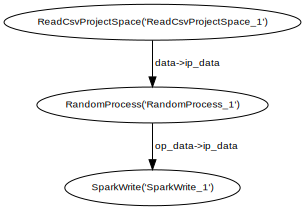

In [12]:
pipe

In [13]:
pipe.execute()

<Process(Pipeline Manager('Pipeline_1'), stopped)>